# Problem Statement

Consider a  linear regression model $${\bf y}={\bf X}\boldsymbol{\beta}+{\bf w}+{\bf g}_{out}$$ where ${\bf X} \in \mathbb{R}^{n\times p} $ is a known design matrix and $\boldsymbol{\beta} \in \mathbb{R}^{p\times 1}$ is an unknown sparse vector. ${\bf w} \in \mathbb{R}^{n\times 1}$ is an inlier noise vector (for theoretical purposes only)  with each entries $\mathcal{N}(0,\sigma^2)$ distributed. Outlier ${\bf g}_{out}\in \mathbb{R}^n$ is an outlier which is sparse, however, the value of $\|{\bf g}_{out}\|_{\infty}$ can be extremely high. The outlier support $\mathcal{S}=\{k:{\bf g}_{out}[k] \neq 0\}$ has cadinality $k_g=cardinality(\mathcal{S})\ll n$. We consider a low dimnesional scenario where number of samples $n$ is much higher than the number of features $p$. 

The problem we address here is the estimation of $\boldsymbol{\beta}$ when outlier sparsity $k_g$ and $\sigma^2$ are both unknown. Under these constraints, it is difficult to estimate $\boldsymbol{\beta}$ and $ \mathcal{S}$ with finite sample guarantees.  Most (not all) popular sparse recovery algorithms including GARD, BPRR,BSRR,AROSI  etc. can deliver estimation  with theoretical  guarantees require $\textit{a priori}$ knowledge of $k_g$ and/or inlier noise variance $\sigma^2$. Algorithms that does not require such a priori information are LAD, M-estimation etc.  

In a recent article (https://ieeexplore.ieee.org/document/8543649 in IEEE TSP) we proposed RRT to operate GARD without requiring $\textit{a priori}$ knowledge of $k_g$ and/or $\sigma^2$.
Here, we illustrate  how to use RRT in this problem setting. 


# Concept  of RRT

Suppose we are given an ordered sequence of outlier support estimates $\mathcal{S}_1,\mathcal{S}_2...\mathcal{S}_{k_{max}}$ such that  a $card(\mathcal{S}_k)=k$ and $\mathcal{S}_k\subset \mathcal{S}_{k+1}$.  Corresponding to each support $\mathcal{S}_k$, one can compute the corresponding least squares residuals as ${\bf R}^k=({\bf I}_{n}-{\bf P}(\mathcal{S}_k)){\bf Y}$, where ${\bf P}(\mathcal{S}_k)$ is the projection onto the subspace spanned by the columns in $[{\bf X},{\bf I}_n[:,\mathcal{S}_k]]$.  ${\bf I}_n$ is the $n \times n$ identity matrix.  The corresponding residual ratios are defined as $$RR(k)=\dfrac{\|{\bf R}^k\|_2}{\|{\bf R}^{k-1}\|_2}$$. 

This statistic satisfies some interesting properties. For starters, $$0\leq RR(k)\leq 1$$

Under appropriate conditions on the matrix ${\bf X}$, SNR and outlier sparsity $k_g$, many algorithms can generate support estimate sequences that satisfy $\mathcal{S}_{k_g}=\mathcal{S}$, the true unknown support of ${\bf g}_{out}$. If those conditions are true then 

$$1). \ \ RR(k_g)\rightarrow 0  \ \text{as} \ \sigma^2\rightarrow 0$$.  

$$2). \ \ \mathbb{P}(RR(k)>\Gamma_{RRT}^{\alpha}(k),\ \text{for all} \ k=k_g+1,....k_{max})>1-\alpha$$

where $$\Gamma_{RRT}^{\alpha}(k)=\sqrt{F_{\dfrac{n-p-k}{2},\dfrac{1}{2}}^{-1}\left(\dfrac{\alpha}{(n-k+1)kmax}\right)}$$
is a sequence of RRT thresholds. $F_{a,b}(x)$ is the CDF of a Beta random variable with parameters $a$ and $b$ and $F^{-1}$ is the inverse function of $F$.  

Properties 1 and 2 of $RR(k)$ means that the RRT estimate of outlier sparsity given by $$k_{RRT}=\max\{k:RR(k)\leq \Gamma_{RRT}^{\alpha}(k)\}$$ will be equal to true unknown sparsity $k_g$ and $\mathcal{S}_{k_{RRT}}$ will be equal to the true unknown outlier support $\mathcal{S}$ at high enough SNR. 




# Usage
In codes, we used (nfeatures=p,outlier_sparsity=$k_g$,nsamples=n)

${\bf Given}$:  Y and X. We assume that X has unit $l_2$ norm columns. 

${\bf Step\  1\ :}$ robust=robust_regression() 

${\bf Step \ 2\ :}$ estimate_support_dict=robust.compute_signal_and_outlier_support(X=X, Y=Y,alpha_list=[0.1])

${\bf Inputs: }$ alpha_list=[$\alpha_1$,$\alpha_2$,...] the set of RRT thresholds alpha for which the estimates of $\boldsymbol{
\beta}$ and outlier support $\mathcal{S}$ is to be computed. 

${\bf Outputs:}$  estimate_support_dict is a dictionary with keys $\alpha$ and values another dictionary dict. dict['outlier_support_estimate'] and dict['signal_estimate'] give the  estimates of $\mathcal{S}$ and $\boldsymbol{\beta}$ corresponding to the RRT threshold $\alpha$.

# Other utility functions

    1). X, Y, Beta_true, outlier_support_true, outlier,inlier_noisevar=robust.generate_random_example(nsamples=100, nfeatures=10, outlier_sparsity=10, SNR_db=10,OIR_db=20)    
This function generates a linear regression model using Gaussian matriX  which is further normalized to have $l_2$ columns. The entries of beta_true are randomly assigned $\pm1$.  Gaussian inlier noise of noise variance determined by the required SNR. Outlier vector is sparse with outlier_sparsity non zero entries randomly selected from $\{1,2,\dotsc,n\}$. The non zero entries are randomly assigned $\pm 1$ and magnitude $g$. Inlier noise variance $\sigma^2$  and outlier magnitude $g$ are selected using the user supplied signal and noise ratio (SNR)
$$SNR=\frac{\|{\bf X}\boldsymbol{\beta}\|_2^2}{n\sigma^2}$$
and user supplied outlier to inlier ratio (OIR)
$$OIR=\frac{\|{\bf g}_{out}\|_2^2}{n\sigma^2}$$
These values are supplied in DB scale. 



    2). Beta_LS=robust.generate_LS_estimate_and_residual(X=X, Y=Y)[0]
                                                
This function computes the plain old LS estimate with outlier contaminated $Y$. With Y=Y-outlier. we can compute the LS estimate with outlier free $Y$. These two are the good baselines for robust regression. LS estimate with outlier contaminated $Y$ is the "worst" performance in regression models and oracle aided LS estimate with outlier free $Y$ is the "best" performance in regression models. 

    3)Beta_gard,outlier_support_gard=robust.GARD_prior_outlier_sparsity(X=X,Y=Y,outlier_sparsity=outlier_sparsity)
This function is the outlier sparsity aware  GARD operation. When provided with an outlier sparsity level, this compute the corresponding signal estimate and outlier support estimate. 

    4). support_error,l2_error=robust.compute_error(outlier_support_true,outlier_support_estimate, 
                              Beta_true, Beta_estimate)
This function compute the support error between true and estimated outlier support (o if same else 1) and $l_2$ error between true and estimated values of $\boldsymbol{\beta}$.


###  Example: Generate a robust regression problem


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os,sys
from codes.robust_regression import robust_regression


In [2]:
robust=robust_regression();
X, Y, Beta_true, outlier_support_true, outlier,inlier_noisevar=robust.generate_random_example(nsamples=100, nfeatures=10, 
                                                                                    outlier_sparsity=10, SNR_db=10,OIR_db=20)
print('Unknown sparse vector Beta is')
print(Beta_true.flatten())
print('Support of outlier is')
print(outlier_support_true)
print('Outlier')
print(np.squeeze(outlier))
print('Inlier noise_variance:{}'.format(inlier_noisevar))

Unknown sparse vector Beta is
[ 1. -1.  1.  1.  1.  1.  1. -1. -1.  1.]
Support of outlier is
[37, 30, 49, 66, 72, 15, 53, 91, 97, 52]
Outlier
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          3.16227766  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -3.16227766  0.          0.          0.          0.          0.
  0.         -3.16227766  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          3.16227766  0.          0.          3.16227766 -3.16227766
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  3.16227766  0.          0.          0.          0.          0.
 -3.16227766  0.          0.          0.          0.          0.
  0.

In [3]:
# Baselines
print('Plain LS estimate with outliers')
Beta_LS=robust.generate_LS_estimate_and_residual(X=X, Y=Y)[0]
print(np.squeeze(Beta_LS))
l2_error=robust.compute_error(outlier_support_true=outlier_support_true, outlier_support_estimate=[], 
                              Beta_true=Beta_true, Beta_estimate=Beta_LS)[1]
print('L2 error for plain LS  estimate={}'.format(l2_error))

print('Plain LS estimate without the outliers')
Beta_LS=robust.generate_LS_estimate_and_residual(X=X, Y=Y-outlier)[0]
print(np.squeeze(Beta_LS))
l2_error=robust.compute_error(outlier_support_true=outlier_support_true, outlier_support_estimate=outlier_support_true, 
                              Beta_true=Beta_true, Beta_estimate=Beta_LS)[1]
print('L2 error for plain LS  estimate when outliers are absent={}'.format(l2_error))

print('GARD estimate when outlier sparsity is a priori given')
Beta_gard,outlier_support_gard=robust.GARD_prior_outlier_sparsity(X=X,Y=Y,outlier_sparsity=len(outlier_support_true))
print(np.squeeze(Beta_gard))
l2_error=robust.compute_error(outlier_support_true=outlier_support_true, outlier_support_estimate=outlier_support_gard, 
                              Beta_true=Beta_true, Beta_estimate=Beta_gard)[1]
print('L2 error for estimate produced  by sparsity aware GARD={}'.format(l2_error))



Plain LS estimate with outliers
[ 0.55122481 -1.23378801  1.31863397  2.09450097  2.47650606  2.39962176
  0.9912589  -0.08320826 -2.96099139  1.40953873]
L2 error for plain LS  estimate=3.247817714258446
Plain LS estimate without the outliers
[ 1.13131048 -1.08234183  1.01059762  1.11019088  0.81406848  0.88360633
  1.19064045 -1.01312945 -0.82156143  1.10088089]
L2 error for plain LS  estimate when outliers are absent=0.4036439211997481
GARD estimate when outlier sparsity is a priori given
[ 1.12207082 -0.98818944  1.00007066  1.04689996  0.80002825  0.91448909
  1.1992527  -1.00538332 -0.89403163  1.11495892]
L2 error for estimate produced  by sparsity aware GARD=0.3587710546720715


### Example: RRT estimation
As one can see that the error of the estimate produced by RRT+GARD is closer to the error in LS estimate without outliers and GARD  a priori provided with outlier sparsity. That is, RRT-GARD produce outlier robust estimates of $\boldsymbol{\beta}$ without knowing anything about inlier noise variance or outlier sparsity level.

In [4]:
results_gard_dict=robust.compute_signal_and_outlier_support(X=X, Y=Y, algorithm='GARD', alpha_list=[0.1])
Beta_estimate=results_gard_dict[0.1]['signal_estimate']
outlier_support_estimate=results_gard_dict[0.1]['outlier_support_estimate']
print('Signal estimate with GARD')
print(np.squeeze(Beta_estimate))
l2_error=robust.compute_error(outlier_support_true=outlier_support_true, outlier_support_estimate=outlier_support_estimate, 
                              Beta_true=Beta_true, Beta_estimate=Beta_estimate)[1]
print('L2 error for estimate produced by RRT-GARD={}'.format(l2_error))


Signal estimate with GARD
[ 1.12207082 -0.98818944  1.00007066  1.04689996  0.80002825  0.91448909
  1.1992527  -1.00538332 -0.89403163  1.11495892]
L2 error for estimate produced by RRT-GARD=0.3587710546720715


# Evaluating performance. 

We compare the performanc of OMP and LASSO operated using RRT against a simple baseline. An OMP algorithm operated using a priori knowledge of sparsity $k_0$. Except at low SNR, LASSO and OMP operated using RRT matches the support aware oracle. In our papers, we compare RRT with OMP and LASSO provided with many OMP and LASSO based schemes.  IN most of our experiments, we found that the performance GAP between OMP/LASSO with a priori known sparsity and noise variance and OMP/LASSO operate dusing RRT is minimal. 

In [7]:
SNR_db=np.linspace(0,30,10)
L2_ERROR_GARD=np.zeros(10); L2_ERROR_GARD_RRT=np.zeros(10);
L2_ERROR_LS_WITH_OUTLIER=np.zeros(10);L2_ERROR_LS_WITHOUT_OUTLIER=np.zeros(10)

num_iter=100; # number of montecarlo iterations for each example. 
nsamples=100;nfeatures=10;outlier_sparsity=10;OIR_db=10 

for s in np.arange(len(SNR_db)):
    snr_db=SNR_db[s]
    l2_error_gard=0; l2_error_gard_rrt=0;
    l2_error_ls_with_outlier=0;l2_error_ls_without_outlier=0;

    for num in np.arange(num_iter):
        X, Y, Beta_true, outlier_support_true, outlier,inlier_noisevar=robust.generate_random_example(nsamples=nsamples, 
                                                                                                      nfeatures=nfeatures, 
                                                                                                      outlier_sparsity=outlier_sparsity, 
                                                                                                      SNR_db=snr_db,
                                                                                                      OIR_db=OIR_db)
        Beta_gard,outlier_support_gard=robust.GARD_prior_outlier_sparsity(X=X,Y=Y,outlier_sparsity=len(outlier_support_true))

        l2_error=robust.compute_error(outlier_support_true=outlier_support_true, 
                                      outlier_support_estimate=outlier_support_gard, 
                                      Beta_true=Beta_true, Beta_estimate=Beta_gard)[1]
        l2_error_gard+=l2_error
        
        results_gard_dict=robust.compute_signal_and_outlier_support(X=X, Y=Y, algorithm='GARD', alpha_list=[0.1])
        Beta_gard_rrt=results_gard_dict[0.1]['signal_estimate']
        outlier_support_estimate=results_gard_dict[0.1]['outlier_support_estimate']
        l2_error=robust.compute_error(outlier_support_true=outlier_support_true, 
                                      outlier_support_estimate=outlier_support_estimate, 
                                      Beta_true=Beta_true, Beta_estimate=Beta_gard_rrt)[1]
        
        Beta_LS_with_outlier=robust.generate_LS_estimate_and_residual(X=X, Y=Y)[0]
        l2_error=robust.compute_error(outlier_support_true=outlier_support_true, outlier_support_estimate=[], 
                              Beta_true=Beta_true, Beta_estimate=Beta_LS_with_outlier)[1]
        l2_error_ls_with_outlier+=l2_error

        Beta_LS_without_outlier=robust.generate_LS_estimate_and_residual(X=X, Y=Y-outlier)[0]

        l2_error=robust.compute_error(outlier_support_true=outlier_support_true, 
                                      outlier_support_estimate=outlier_support_true, 
                                      Beta_true=Beta_true, Beta_estimate=Beta_LS_without_outlier)[1]
        l2_error_ls_without_outlier+=l2_error
        
    L2_ERROR_GARD[s]=l2_error_gard; L2_ERROR_GARD_RRT[s]=l2_error_gard_rrt;
    L2_ERROR_LS_WITH_OUTLIER[s]=l2_error_ls_with_outlier;
    L2_ERROR_LS_WITHOUT_OUTLIER[s]=l2_error_ls_without_outlier

Text(0, 0.5, 'l2_error')

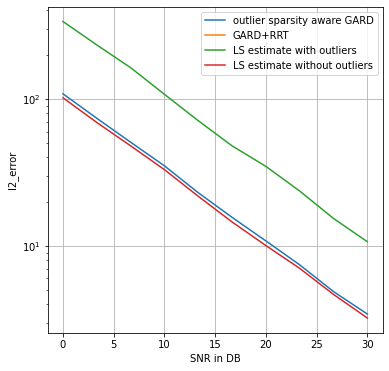

In [8]:
plt.figure(figsize=(6,6))
plt.semilogy(SNR_db,L2_ERROR_GARD,label='outlier sparsity aware GARD')
plt.semilogy(SNR_db,L2_ERROR_GARD_RRT,label='GARD+RRT')
plt.semilogy(SNR_db,L2_ERROR_LS_WITH_OUTLIER,label='LS estimate with outliers')
plt.semilogy(SNR_db,L2_ERROR_LS_WITHOUT_OUTLIER,label='LS estimate without outliers')
plt.grid()
plt.legend()
plt.xlabel('SNR in DB')
plt.ylabel('l2_error')  
